<a href="https://colab.research.google.com/github/AndrewstheBuilder/DeepLearning/blob/main/Titanic_Project/Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


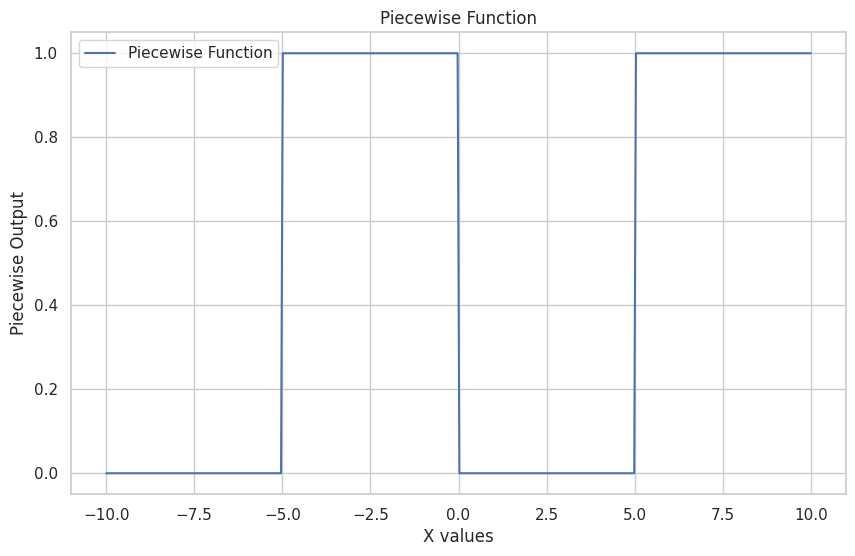

Correlation coefficient: 0.43301405506325596


In [2]:
# Prove to myself that outputs going up and down will give a bad correlation
# Correlation only captures monotonic relationships
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def piecewise(x):
    if x < -5:
        return 0
    elif -5 <= x < 0:
        return 1
    elif 0 <= x < 5:
        return 0
    else:
        return 1

# Generate x values
x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# Apply the piecewise function to each x value
y = np.array([piecewise(xi) for xi in x])

# Plotting the Sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Piecewise Function')
plt.title('Piecewise Function')
plt.xlabel('X values')
plt.ylabel('Piecewise Output')
plt.grid(True)
plt.legend()
plt.show()

# Create a DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Calculate correlation
correlation = data['X'].corr(data['Y'])
print("Correlation coefficient:", correlation)

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: './drive/MyDrive/Titanic_Challenge/train.csv'

In [ ]:
data.head()

In [ ]:
numeric_df = data.select_dtypes(include=[float, int])
numeric_df['Sex'] = data['Sex'].map({'male': 0, 'female':1})
numeric_df['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

# numeric_df.head()
numeric_df.corr()

In [ ]:
# data[['Age','Survived']].plot()
# data['Age'].hist(by=data['Survived'], bins=20, alpha=0.7, figsize=(10, 5))
# plt.show()

In [ ]:
# Determine Age bands and check correlation with Survived
# print(pd.cut(data['Age'],5))
# print(data['Age'].head())
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Completely useless plot
# But it shows why the correlation calculation would not work.
# The data is up and down
plt.figure(figsize=(50,6))
plt.scatter(data['Age'], data['Survived'], alpha=1, color='red')
plt.title("Scatter Plot of Survived vs. Age")
plt.xlabel('Age')
plt.ylabel('Survived')
plt.xticks(range(1, 101, 1))
plt.grid(True)
plt.show()

In [ ]:
# Load and analyze the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Define a function to plot survival count based on a given feature
def plot_survival(data, column):
    if column=='Age' or column=='Fare':
        # Create a facet grid of Histograms for numeric data
#         print('column',column)
#         print('column != Age', column!='Age')
#         print('data[column].dtype',data[column].dtype)
        g = sns.FacetGrid(data, col='Survived', height=5, aspect=1)
        g.map(sns.histplot, column, bins=20, kde=False)
    else:
        # Create a count plot for categorical data
#         print('column 2',column)
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Survived', data=data, palette='viridis')
        plt.title(f'Survival Count by {column}')
        plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
        plt.show()

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    plot_survival(data, column)


In [ ]:
# Based on the analysis of the data
# what should I expect for most likely for surviving and not surviving
# The columns we got are pClass, sex, age, sibsp, parch, ticket, fare, embarked
# Create fare bins
data['FareBin'] = pd.cut(data['Fare'], bins=[0, 10, 20, 30, 50, 100, 500])

# Compute survival counts per fare bin
fare_counts = data.pivot_table(index='FareBin', columns='Survived', aggfunc='size', fill_value=0)
# print(fare_counts)
# Calculate ratio of non-survivors to survivors
fare_counts['Ratio'] = fare_counts[0] / fare_counts[1]
# print('fare_counts\n',fare_counts)
# Find the fare bin with the highest ratio
highest_ratio_bin = fare_counts['Ratio'].idxmax()
highest_ratio_value = fare_counts.loc[highest_ratio_bin, 'Ratio']

print(highest_ratio_bin, highest_ratio_value)

(0, 10] 3.8636363636363638


In [ ]:
# This is me attempting to find a statistic that will make the data make sense
# This is the ratio. Deaths/survived of each column to see which column category had the highest
    # deaths out of the survival
# I am not sure this stat makes sense. It made sense when I looked at the graph. But
# now I am like what is this even computing?
# Shouldn't it be deaths/total for each column category.
# Example: Column -> 'Fare', Column Category -> (0,10), (10,20] in 'Fare's
def find_highest_ratio(data, column):
    if column=='Fare':
        # Create fare bins
        data['FareBin'] = pd.cut(data['Fare'], bins=[0, 10, 20, 30, 50, 100, 500])

        # Compute survival counts per fare bin
        fare_counts = data.pivot_table(index='FareBin', columns='Survived', aggfunc='size', fill_value=0)
#         print(fare_counts)
        # Calculate ratio of non-survivors to survivors
        fare_counts['Ratio'] = fare_counts[0] / fare_counts[1]
        # print('fare_counts\n',fare_counts)
        # Find the fare bin with the highest ratio
        highest_ratio_bin = fare_counts['Ratio'].idxmax()
        highest_ratio_value = fare_counts.loc[highest_ratio_bin, 'Ratio']
        print('Fare')
        print(highest_ratio_bin, highest_ratio_value)
    elif column=='Embarked':
        # Create bins
#         print('data[column]',data[column])
#         print('type(data[column])',type(data[column]))
#         print('typeof(data)',type(data))
        data['Bin'] = data[column]
        survival_counts = data.pivot_table(index='Bin', columns='Survived', aggfunc='size', fill_value=0)
        print('Embarked')
        print('survival_counts',survival_counts)

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    find_highest_ratio(data, column)

Fare
(0, 10] 3.8636363636363638
Embarked
survival_counts Survived    0    1
Bin               
C          75   93
Q          47   30
S         427  217
